In [24]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [25]:
train=pd.read_csv('./win1_sc.csv',encoding='euc-kr',index_col='기업명')
train
_train=train.iloc[:,2:8]
_train.drop('대덕',axis=0,inplace=True)

In [26]:
Kmeans= KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)

Kmeans.fit(_train)

KMeans(n_clusters=3, random_state=0)

In [27]:
print(Kmeans.labels_)
_train['cluster']= Kmeans.labels_

[0 0 1 ... 0 0 2]


In [28]:
_train['cluster'].value_counts()


cluster
0    2548
1     918
2     285
Name: count, dtype: int64

In [34]:
_train.groupby('cluster').mean()

,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR
cluster,,,,,,
0,26.407516,-0.164597,0.256295,-0.020023,0.014134,-0.253066
1,29.205545,0.375920,-0.629374,-0.009800,0.007833,-0.176656
2,26.663973,0.261899,-0.268440,-0.003605,-0.153993,2.833802


In [30]:
_train[_train['cluster']==0]

,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,cluster
기업명,,,,,,,
CS홀딩스,25.963708,-0.367185,1.539085,0.016273,0.125672,-0.753474,0
KISCO홀딩스,27.382216,-0.371555,1.600118,-0.021487,0.051014,-0.794531,0
MH에탄올,25.622648,0.131503,-0.998226,-0.057522,-0.198769,-0.772423,0
SH에너지화학,25.374468,-0.255314,0.423712,-0.007049,-0.054460,-0.636619,0
SIMPAC,26.462671,-0.196251,0.052386,-0.001826,0.198392,-0.267103,0
...,...,...,...,...,...,...,...
화천기공,26.776382,-0.311890,0.897535,0.009640,-0.041084,-0.822955,0
환인제약,26.590269,-0.378762,1.705412,-0.029547,0.749097,-0.251312,0
황금에스티,26.790692,-0.332431,1.110453,-0.009781,1.041681,-0.567137,0


In [31]:
_train[_train['cluster']==1]

,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,cluster
기업명,,,,,,,
LG이노텍,29.114888,0.177533,-1.079759,-0.013113,0.093215,0.111887,1
OCI,29.605798,-0.171994,-0.073873,0.013542,1.346364,0.910925,1
SK이노베이션,31.187137,-0.065320,-0.506698,0.011381,-0.024358,-0.008126,1
STX,29.286230,0.027667,-0.774126,0.041742,-0.172682,-0.200780,1
STX엔진,28.887774,0.203674,-1.122156,-0.015889,-0.454994,-0.368167,1
...,...,...,...,...,...,...,...
효성,29.290748,-0.217119,0.172124,-0.029547,-0.316296,-0.459756,1
효성중공업,29.022975,0.315621,-1.278234,-0.029547,-0.044222,-0.541871,1
효성첨단소재,28.698721,0.353865,-1.323427,-0.029547,0.099366,1.874192,1


In [32]:
_train[_train['cluster']==2]

,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,cluster
기업명,,,,,,,
녹십자홀딩스,29.157776,0.632100,-1.572685,-0.033974,0.473360,4.122868,2
더존비즈온,25.843709,-0.008116,-0.680014,-0.031723,1.025979,2.906941,2
보해양조,26.221360,0.536250,-1.500004,-0.028871,0.523611,4.688195,2
삼성엔지니어링,29.277488,0.333726,-1.300131,0.083060,-0.198117,3.898632,2
신풍제약,26.659481,-0.129907,-0.265360,-0.030342,0.390736,2.707971,2
...,...,...,...,...,...,...,...
한창,25.623181,0.252942,-1.195303,-0.032083,-0.706274,2.524792,2
호텔신라,28.608012,0.497955,-1.467391,-0.001721,-0.163657,3.020638,2
후성,27.147056,-0.112354,-0.336643,0.039101,0.847486,2.796402,2


In [51]:
score_samples= silhouette_samples(_train, _train['cluster'])
#print('silhouette_samples() return 값의 shape', score_samples.shpae)

_train['silhouette_coeff']= score_samples

average_score = silhouette_score(_train, _train['cluster'])
print('불꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

_train.head(15)

불꽃 데이터셋 Silhouette Analysis Score:0.317


,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,ESG_-,ESG_A,ESG_A+,ESG_B,...,G_-,G_A,G_A+,G_B,G_B+,G_B이하,G_C,G_D,cluster,silhouette_coeff
기업명,,,,,,,,,,,,,,,,,,,,,
CS홀딩스,25.963708,-0.367185,1.539085,0.016273,0.125672,-0.753474,False,False,False,False,...,False,False,False,False,False,False,True,False,1,0.374549
KISCO홀딩스,27.382216,-0.371555,1.600118,-0.021487,0.051014,-0.794531,False,False,False,False,...,False,False,False,False,False,False,True,False,1,0.218953
LG이노텍,29.114888,0.177533,-1.079759,-0.013113,0.093215,0.111887,False,True,False,False,...,False,True,False,False,False,False,False,False,2,0.286350
MH에탄올,25.622648,0.131503,-0.998226,-0.057522,-0.198769,-0.772423,False,False,False,False,...,False,False,False,False,False,True,False,False,1,0.370013
OCI,29.605798,-0.171994,-0.073873,0.013542,1.346364,0.910925,False,True,False,False,...,False,True,False,False,False,False,False,False,2,0.253534
SH에너지화학,25.374468,-0.255314,0.423712,-0.007049,-0.054460,-0.636619,False,False,False,False,...,False,False,False,False,False,False,True,False,1,0.484634
SIMPAC,26.462671,-0.196251,0.052386,-0.001826,0.198392,-0.267103,False,False,False,False,...,False,False,False,False,False,False,True,False,1,0.435541
SK이노베이션,31.187137,-0.065320,-0.506698,0.011381,-0.024358,-0.008126,False,True,False,False,...,False,False,False,False,False,False,True,False,2,0.345151
STX,29.286230,0.027667,-0.774126,0.041742,-0.172682,-0.200780,False,False,False,False,...,False,False,False,False,True,False,False,False,2,0.313992


In [52]:
_train.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.057992
1    0.392519
2    0.177965
Name: silhouette_coeff, dtype: float64

<Axes: >

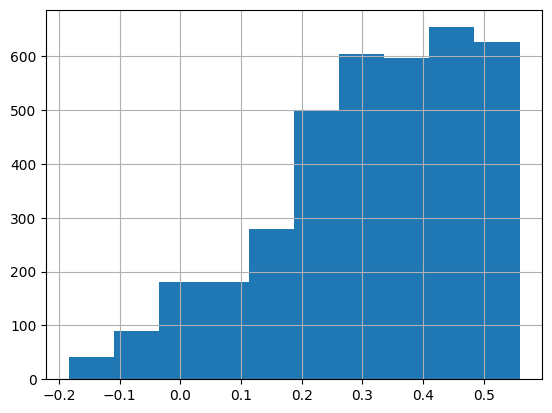

In [53]:
_train['silhouette_coeff'].hist()

In [18]:
### 여러개의 클러스트링 개수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [20]:
# 클러스터 수 변화시키면서 random 데이터 실루엣 계수 분포 시각화

# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  

X =_train.iloc[:,2:40]
train=pd.read_csv('./win1_sc.csv',encoding='euc-kr',index_col='기업명')
train
_train=train.iloc[:,2:40]
_train.drop('대덕',axis=0,inplace=True)

Y= _train['cluster']

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

KeyError: "['대덕'] not found in axis"

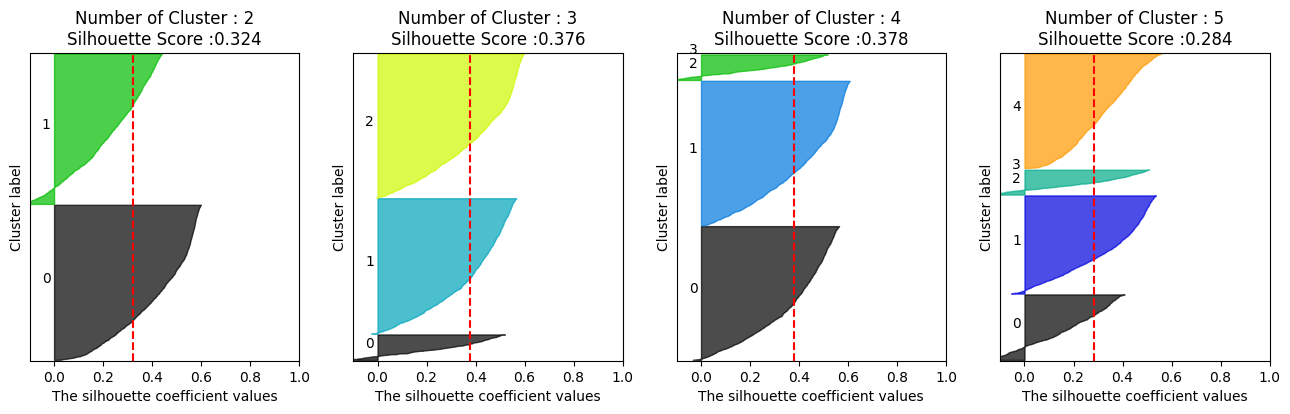

In [23]:
A=pd.read_csv('./winsor_2.csv',encoding='euc-kr',index_col='기업명')
A=pd.get_dummies(A,columns=['ESG','E','S','G'])
A['총자산규모']=np.log(A['총자산규모'])
A=A.loc[:,['업종명', '평가연도', '총자산규모', '부채비율', '자기자본비율', '매출액증가율', '현금흐름', 'PBR'
       ,'ESG_-', 'ESG_A', 'ESG_A+', 'ESG_B', 'ESG_B+', 'ESG_B이하',
       'ESG_C', 'ESG_D', 'E_-', 'E_A', 'E_A+', 'E_B', 'E_B+', 'E_B+ 이하', 'E_C',
       'E_D', 'S_-', 'S_A', 'S_A+', 'S_B', 'S_B+', 'S_B이하', 'S_C', 'S_D',
       'G_-', 'G_A', 'G_A+', 'G_B', 'G_B+', 'G_B이하', 'G_C', 'G_D','배당기업구분']]







X =_train.iloc[:,2:8]
# Y= _train['cluster']

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

## DBSCAN

In [6]:
train=pd.read_csv('./win1_sc.csv',encoding='euc-kr',index_col='기업명')
train
_train=train.iloc[:,2:40]
_train.drop('대덕',axis=0,inplace=True)

In [12]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.1,min_samples=)
predict = pd.DataFrame(model.fit_predict(_train))
predict.columns=['predict']

In [13]:
predict.value_counts()


predict
-1         3751
Name: count, dtype: int64

## Meanshift

In [24]:
import numpy as np
from sklearn.cluster import MeanShift

X =_train.iloc[:,2:40]
#Y= _train['cluster']

meanshift=MeanShift(bandwidth=2.403)
cluster_labels= meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
